In [ ]:
from datetime import datetime
print("last update: {}".format(datetime.now())) 

last update: 2023-04-17 01:53:20.804554


In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import  classification_report

In [ ]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Maize Leaf Disease Dataset.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
file_path = '/tmp/data'

In [ ]:
name_class = os.listdir(file_path)
name_class

['Blight', 'Gray_Leaf_Spot', 'Healthy', 'Common_Rust']

In [ ]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [ ]:
filepaths

['/tmp/data/Blight/Corn_Blight (423).jpg',
 '/tmp/data/Blight/Corn_Blight (866).JPG',
 '/tmp/data/Blight/Corn_Blight (164).JPG',
 '/tmp/data/Blight/Corn_Blight (693).JPG',
 '/tmp/data/Blight/Corn_Blight (574).JPG',
 '/tmp/data/Blight/Corn_Blight (1016).JPG',
 '/tmp/data/Blight/Corn_Blight (1050).JPG',
 '/tmp/data/Blight/Corn_Blight (838).JPG',
 '/tmp/data/Blight/Corn_Blight (1018).jpg',
 '/tmp/data/Blight/Corn_Blight (453).JPG',
 '/tmp/data/Blight/Corn_Blight (506).JPG',
 '/tmp/data/Blight/Corn_Blight (458).JPG',
 '/tmp/data/Blight/Corn_Blight (643).JPG',
 '/tmp/data/Blight/Corn_Blight (357).JPG',
 '/tmp/data/Blight/Corn_Blight (23).jpg',
 '/tmp/data/Blight/Corn_Blight (560).JPG',
 '/tmp/data/Blight/Corn_Blight (612).JPG',
 '/tmp/data/Blight/Corn_Blight (885).JPG',
 '/tmp/data/Blight/Corn_Blight (944).JPG',
 '/tmp/data/Blight/Corn_Blight (819).JPG',
 '/tmp/data/Blight/Corn_Blight (877).jpg',
 '/tmp/data/Blight/Corn_Blight (556).JPG',
 '/tmp/data/Blight/Corn_Blight (256).JPG',
 '/tmp/da

In [ ]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',
 'Blight',

In [ ]:
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)

,Filepath,Label
0,/tmp/data/Common_Rust/Corn_Common_Rust (225).JPG,Common_Rust
1,/tmp/data/Healthy/Corn_Health (94).jpg,Healthy
2,/tmp/data/Healthy/Corn_Health (272).jpg,Healthy
3,/tmp/data/Healthy/Corn_Health (954).jpg,Healthy
4,/tmp/data/Blight/Corn_Blight (995).JPG,Blight


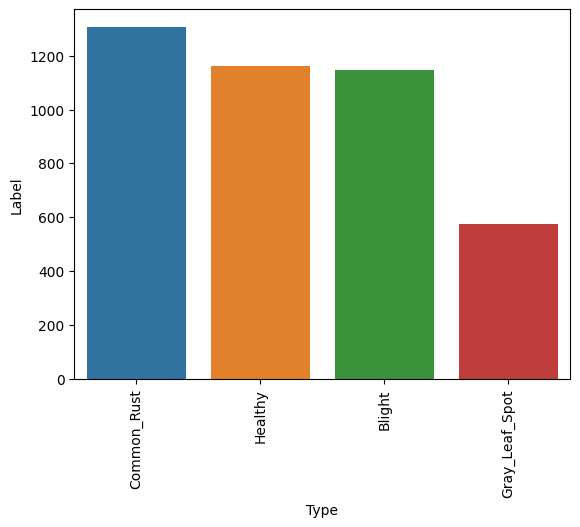

In [ ]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [ ]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

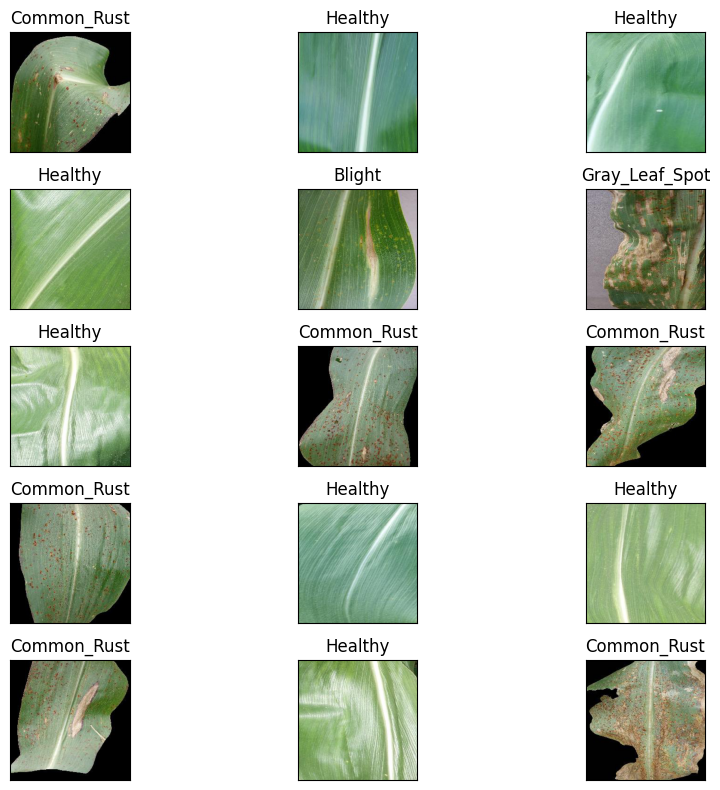

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 3141 validated image filenames belonging to 4 classes.
Found 1047 validated image filenames belonging to 4 classes.
Found 1047 validated image filenames belonging to 4 classes.


In [ ]:
pretrained_model = ResNet50(
    input_shape=(100,100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(4, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 106, 106, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 50, 50, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1_conv[0][0]']         

In [ ]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=10
)

Epoch 1/10
99/99 [==============================] - 221s 2s/step - loss: 0.3323 - accuracy: 0.8676 - val_loss: 0.3160 - val_accuracy: 0.8844
Epoch 2/10
99/99 [==============================] - 211s 2s/step - loss: 0.1560 - accuracy: 0.9373 - val_loss: 0.3029 - val_accuracy: 0.8921
Epoch 3/10
99/99 [==============================] - 211s 2s/step - loss: 0.0971 - accuracy: 0.9621 - val_loss: 0.2954 - val_accuracy: 0.9112
Epoch 4/10
99/99 [==============================] - 211s 2s/step - loss: 0.0512 - accuracy: 0.9806 - val_loss: 0.3116 - val_accuracy: 0.9207
Epoch 5/10
99/99 [==============================] - 172s 2s/step - loss: 0.0294 - accuracy: 0.9917 - val_loss: 0.3303 - val_accuracy: 0.9121
Epoch 6/10
99/99 [==============================] - 170s 2s/step - loss: 0.0165 - accuracy: 0.9965 - val_loss: 0.3343 - val_accuracy: 0.9217
Epoch 7/10
99/99 [==============================] - 211s 2s/step - loss: 0.0121 - accuracy: 0.9965 - val_loss: 0.3773 - val_accuracy: 0.9198
Epoch 8/10
99

In [ ]:
model.save("model_resnet50.h5")  

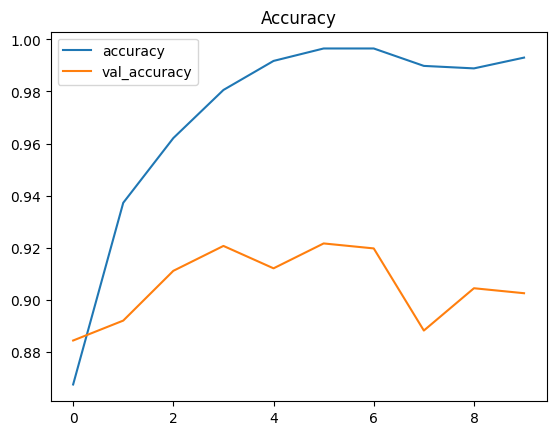

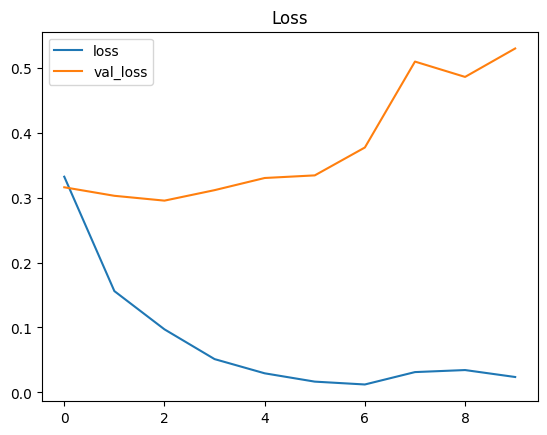

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
results = model.evaluate(test_gen, verbose=0)

print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Loss: 0.52986
Test Accuracy: 90.26%


In [ ]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

33/33 [==============================] - 44s 1s/step


In [ ]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

                precision    recall  f1-score   support

        Blight       0.84      0.86      0.85       267
   Common_Rust       0.91      0.96      0.94       341
Gray_Leaf_Spot       0.81      0.66      0.73       144
       Healthy       0.98      0.99      0.98       295

      accuracy                           0.90      1047
     macro avg       0.89      0.87      0.88      1047
  weighted avg       0.90      0.90      0.90      1047



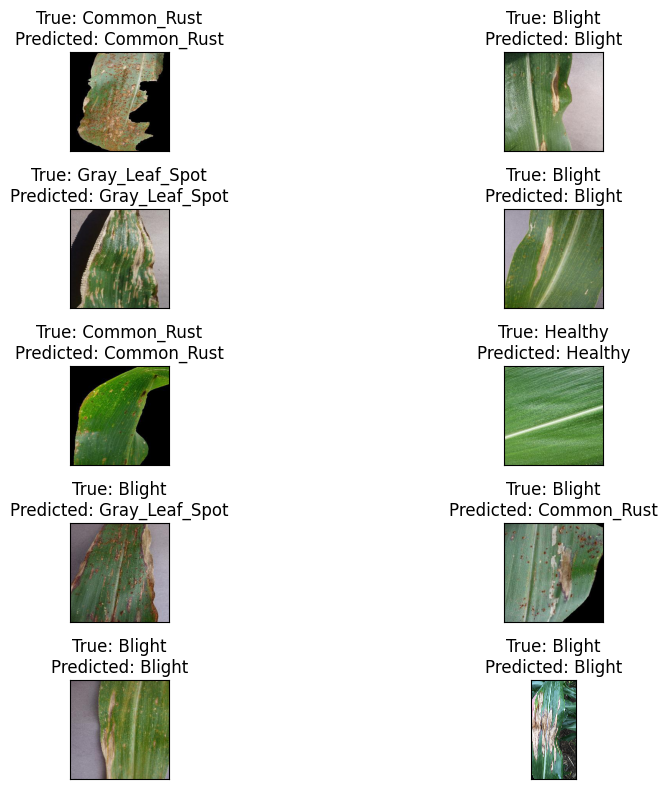

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [ ]:
# More fine tuning the model
# Training the model after 150 layers
# Generally ResNet is good at extracting lower level features so we are not fine tuning initial layers
from tensorflow.keras import layers, optimizers
epochs = 10
batch_size=32

split_at = 140
for layer in model.layers[:split_at]: layer.trainable = False
for layer in model.layers[split_at:]: layer.trainable = True
    
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Choosing lower learning rate for fine-tuning
# learning rate is generally 10-1000 times lower than normal learning rate, if we are fine tuning the initial layers
sgd = optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.fit(
    train_gen,
    steps_per_epoch=train_gen.n//batch_size,
    validation_data=valid_gen,
    validation_steps=valid_gen.n//batch_size,
    epochs=epochs,
    verbose=1)

Epoch 1/10
98/98 [==============================] - 399s 4s/step - loss: 0.1352 - accuracy: 0.9511 - val_loss: 0.3763 - val_accuracy: 0.9199
Epoch 2/10
98/98 [==============================] - 385s 4s/step - loss: 0.0260 - accuracy: 0.9945 - val_loss: 0.3426 - val_accuracy: 0.9248
Epoch 3/10
98/98 [==============================] - 345s 4s/step - loss: 0.0071 - accuracy: 0.9994 - val_loss: 0.3149 - val_accuracy: 0.9326
Epoch 4/10
98/98 [==============================] - 335s 3s/step - loss: 0.0058 - accuracy: 0.9990 - val_loss: 0.3104 - val_accuracy: 0.9268
Epoch 5/10
98/98 [==============================] - 337s 3s/step - loss: 0.0146 - accuracy: 0.9977 - val_loss: 0.3098 - val_accuracy: 0.9219
Epoch 6/10
98/98 [==============================] - 337s 3s/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.3245 - val_accuracy: 0.9238
Epoch 7/10
98/98 [==============================] - 339s 3s/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.3160 - val_accuracy: 0.9268
Epoch 8/10
98

In [ ]:
results = model.evaluate(test_gen, verbose=0)

print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Loss: 0.30945
Test Accuracy: 93.60%


In [ ]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

33/33 [==============================] - 48s 1s/step


In [ ]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

                precision    recall  f1-score   support

        Blight       0.88      0.91      0.89       267
   Common_Rust       0.97      0.96      0.96       341
Gray_Leaf_Spot       0.87      0.83      0.85       144
       Healthy       0.98      0.99      0.98       295

      accuracy                           0.94      1047
     macro avg       0.92      0.92      0.92      1047
  weighted avg       0.94      0.94      0.94      1047



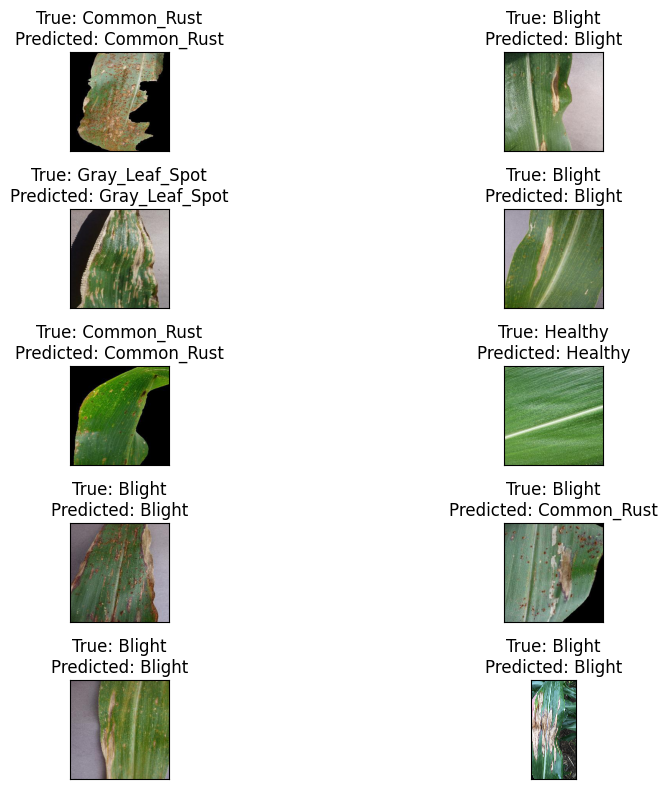

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()